1.1.1 The "Hit-or-Miss" Method

Example 1.1:

The likelihood of some event E can be calculated as a long-run ratio of the number of times when the event E occurs to the total number of trials.  Count the number of times, NE(n), the event E occurs in the first n trials that are performed independently and under identical conditions. The probability P(E) is approximated as P(E) ≈ NE(n) / n.

In [1]:
%% Toss an unblanced coin and calculate the number of heads
%% Estimate the probability of a head 
n = 1000; % The number of tosses
p = 0.4;  % The probability of head
U = rand(n,1); % n samples from Unif[0,1]
B = (U <= p);  % n samples from Bern(p)
NH = sum(B);   % Number of heads
prob_est = NH / n;   % Estimate the probability
disp(prob_est)


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.

0.3730


Example 1.2:

Consider a planar figure D  contained completely within the unit square S = [0,1] x [0,1]. Select a point at random uniformly on the square. The likelihood that such a randomly chosen point belongs to D equals the ratio of the area |D| of D to the area |S| of the unit square (which equals one). Choose at random n points independently and uniformly on the square. Let ND(n) points fall on the figure D. The area of D is approximated as |D| ≈ ND(n) / n x |S|.

In [2]:
%% Let D be a circle inscribed in the unit square S = [0,1] x [0,1]
%% Drop n random points uniformly distributed on S 
%% Calculate how many of them fallen on D
%% Estimate the area of the figure D
n = 10000;          % The number of points
Points = rand(n,2); % Coordinates of the points sampled from Unif[0,1]
Dist = sqrt( (Points(:,1)-0.5).^2 + (Points(:,2)-0.5).^2 );  
                       % Distance from the center (0.5,0.5) 
ND = sum(Dist < 0.5);  % Number of points falled on the figure D
area_est = ND / n;     % Estimate the area
fprintf('The area of D is approximately %f8.4\n',area_est) 
pi_est = 4 * area_est; % Estimate the number pi
                       % Use the fact that |D| = pi^2 / 4
fprintf('The number pi is approximately %f8.4\n',pi_est) 


The area of D is approximately 0.7892008.4
The number pi is approximately 3.1568008.4


Example 1.3:

Sample n points in the unit square S = [0,1] x [0,1] and plot them. The points landed within the circle D inscribed in S are plotted in blue.

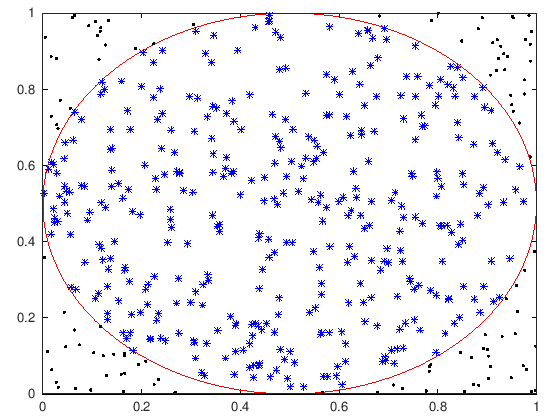

In [3]:
%% Let D be a circle inscribed in the unit square S = [0,1] x [0,1]
%% Drop n random points uniformly distributed on S and plot them
n = 500;              % The number of points
Points = rand(n,2);   % Coordinates of the points sampled from Unif[0,1]
Dist = sqrt( (Points(:,1)-0.5).^2 + (Points(:,2)-0.5).^2 );  
                      % Distance from the center (0.5,0.5) 
IndPinD = Dist < 0.5; % Indicator of points fallen on the figure D
plot( [0,1,1,0], [0,0,1,1], '-k' );  % Draw the square S
hold on                     % Hold the plot to include other elements
phi = linspace(0,2*pi,100); % Generate angles for ploting the circle
plot( 0.5+0.5*cos(phi), 0.5+0.5*sin(phi), '-r'); 
                            % Plot the circle
plot( Points(IndPinD,1), Points(IndPinD,2), '*b'); 
                            % Plot the points fallen on D
plot( Points(not(IndPinD),1), Points(not(IndPinD),2), '.k'); 
                            % Plot the points landed outside of D
hold off

1.1.2 Classic Limit Theorems

Example 2.1:

The Law of Large Numbers (LLN) llies in the foundation of Monte Carlo methods. Kolmogorov's Strong LLN states that the arithmetic average of iid random variable with common finite mean converges to the mean value almost surely as the number of variables grows:
 $$\overline{X}_n := \frac{1}{n}\sum_{k=1}^n X_k \overset{\text{a.s.}}{\to} \mathrm{E}[X] \text{\ as\  }n\to \infty\\ \text{where \ }\{X_k\}_{k\geq 1}\text{\ are iid random variables with finite mean\ } \mathrm{E}[X]$$

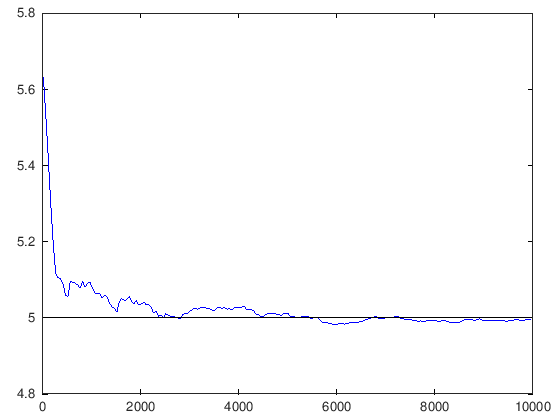

In [4]:
%% Generate n samples drawn from Norm(a,b^2)
%% Demonstrate the convergence of the sample mean to the true mean
n = 10000;        % The number of samples
a = 5;            % The mean of the normal distribution
b = 2;            % The standard deviation of the distribution
XVals = a+b*randn(n,1);            % Sample values drawn from Norm(a,b^2)
CumSumVals = cumsum(XVals);        % Cumulative sums of sample values
SamplMean = CumSumVals ./ (1:n)';  % Sample means
nVals = 10:50:n;                   % Sample sizes for plotting
plot( nVals, SamplMean(nVals), '-b' );  
                             % Plot the average vs the number of samples
hold on                      % Hold the plot to include other elements
plot( [1 n], [a a], '-k'  ); % Plot the true mean value
hold off

Example 2.2:

The Central Limit Theorem (CLT) allows for estimating an approximation error caused by using the sample mean to approximate the true mean.

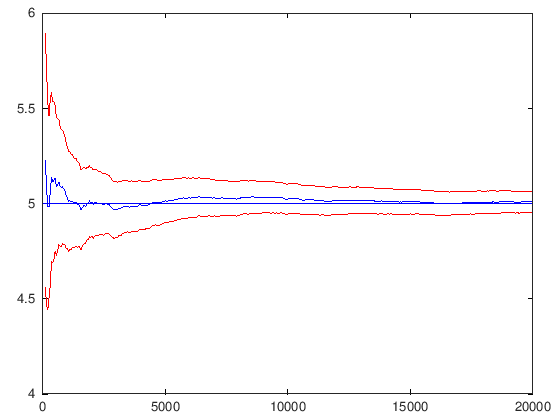

In [5]:
%% Generate n samples drawn from Norm(a,b^2)
%% Construct a sequence of 95% confidence intervals for the true mean
%% Demonstrate the convergence of the endpoints to the true mean
n = 20000;        % The number of samples
a = 5;            % The mean of the normal distribution
b = 2;            % The standard deviation of the distribution
XVals = a+b*randn(n,1);            % Sample values drawn from Norm(a,b^2)
CumSumVals = cumsum(XVals);        % Cumulative sums of sample values
CumSumSqrVals = cumsum(XVals.^2);  % Cumulative sums of squares 
SamplMean = CumSumVals ./ (1:n)';  % Sample means
SamplStdDev = CumSumSqrVals ./ (1:n)' - SamplMean.^2; 
                                   % Sample standard deviations
LeftEndPoint = SamplMean - 1.96*SamplStdDev./sqrt((1:n)');
RightEndPoint = SamplMean + 1.96*SamplStdDev./sqrt((1:n)');
                                   % Endpoints of confidence intervals
nVals = 100:50:n;                  % Sample sizes for plotting
plot( nVals, SamplMean(nVals), '-b');  
                       % Plot the average vs the number of samples
hold on                % Hold the plot to include other elements
plot( nVals, LeftEndPoint(nVals), '-r' );  
plot( nVals, RightEndPoint(nVals), '-r' );  
                       % Plot endpoints of confidence intervals
plot( [1 n], [a a], '-b' );  % Plot the true mean value
hold off